In [1]:
# Segmentar la información en conjuntos de 100 datos 
# hayar la distribución de cada conjunto 
# Hacer el poceso con cada distribución 

In [2]:
# Importar librerias 
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pystan

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [2]:

eth_symbol = "ETH-USD"

start_date = "2023-10-20"
end_date = "2023-10-28"

eth_data = yf.download(eth_symbol, start=start_date, end=end_date, interval="1h")


[*********************100%%**********************]  1 of 1 completed


In [69]:
eth_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-01 00:00:00+00:00,1873.914673,1887.705322,1869.306519,1870.712280,1870.712280,0
2023-06-01 01:00:00+00:00,1870.937012,1879.452148,1870.937012,1874.979492,1874.979492,121993728
2023-06-01 02:00:00+00:00,1874.847168,1875.414917,1851.861572,1854.238770,1854.238770,22784512
2023-06-01 03:00:00+00:00,1852.853882,1858.300171,1846.227417,1855.578369,1855.578369,277991936
2023-06-01 04:00:00+00:00,1855.476074,1856.627808,1852.953125,1855.116943,1855.116943,0
...,...,...,...,...,...,...
2023-10-27 19:00:00+00:00,1765.560059,1775.131836,1765.560059,1773.784790,1773.784790,2174976
2023-10-27 20:00:00+00:00,1774.048462,1782.374878,1774.048462,1781.435181,1781.435181,0
2023-10-27 21:00:00+00:00,1781.354736,1782.988281,1779.203979,1780.713135,1780.713135,0


In [70]:
#eth_data = eth_data.head(5)

In [71]:
#eth_data.to_csv('eth_data.csv')

In [72]:
eth_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [73]:
eth_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3.575000e+03
mean,1749.551942,1753.159794,1745.893870,1749.530795,1749.530795,7.002876e+07
std,123.975272,124.153152,123.728054,123.958135,123.958135,1.819307e+08
min,1528.242188,1530.250366,1523.237549,1528.684448,1528.684448,0.000000e+00
25%,1634.890442,1637.454956,1632.758789,1634.823547,1634.823547,0.000000e+00
50%,1741.331909,1745.575562,1737.463135,1741.018066,1741.018066,0.000000e+00
75%,1864.554077,1868.230225,1860.749817,1864.459412,1864.459412,6.515763e+07
max,2022.622925,2026.204956,2012.420410,2019.637573,2019.637573,2.530970e+09


In [74]:
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3575 entries, 2023-06-01 00:00:00+00:00 to 2023-10-27 23:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3575 non-null   float64
 1   High       3575 non-null   float64
 2   Low        3575 non-null   float64
 3   Close      3575 non-null   float64
 4   Adj Close  3575 non-null   float64
 5   Volume     3575 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 195.5 KB


## Presentación de las gráficas

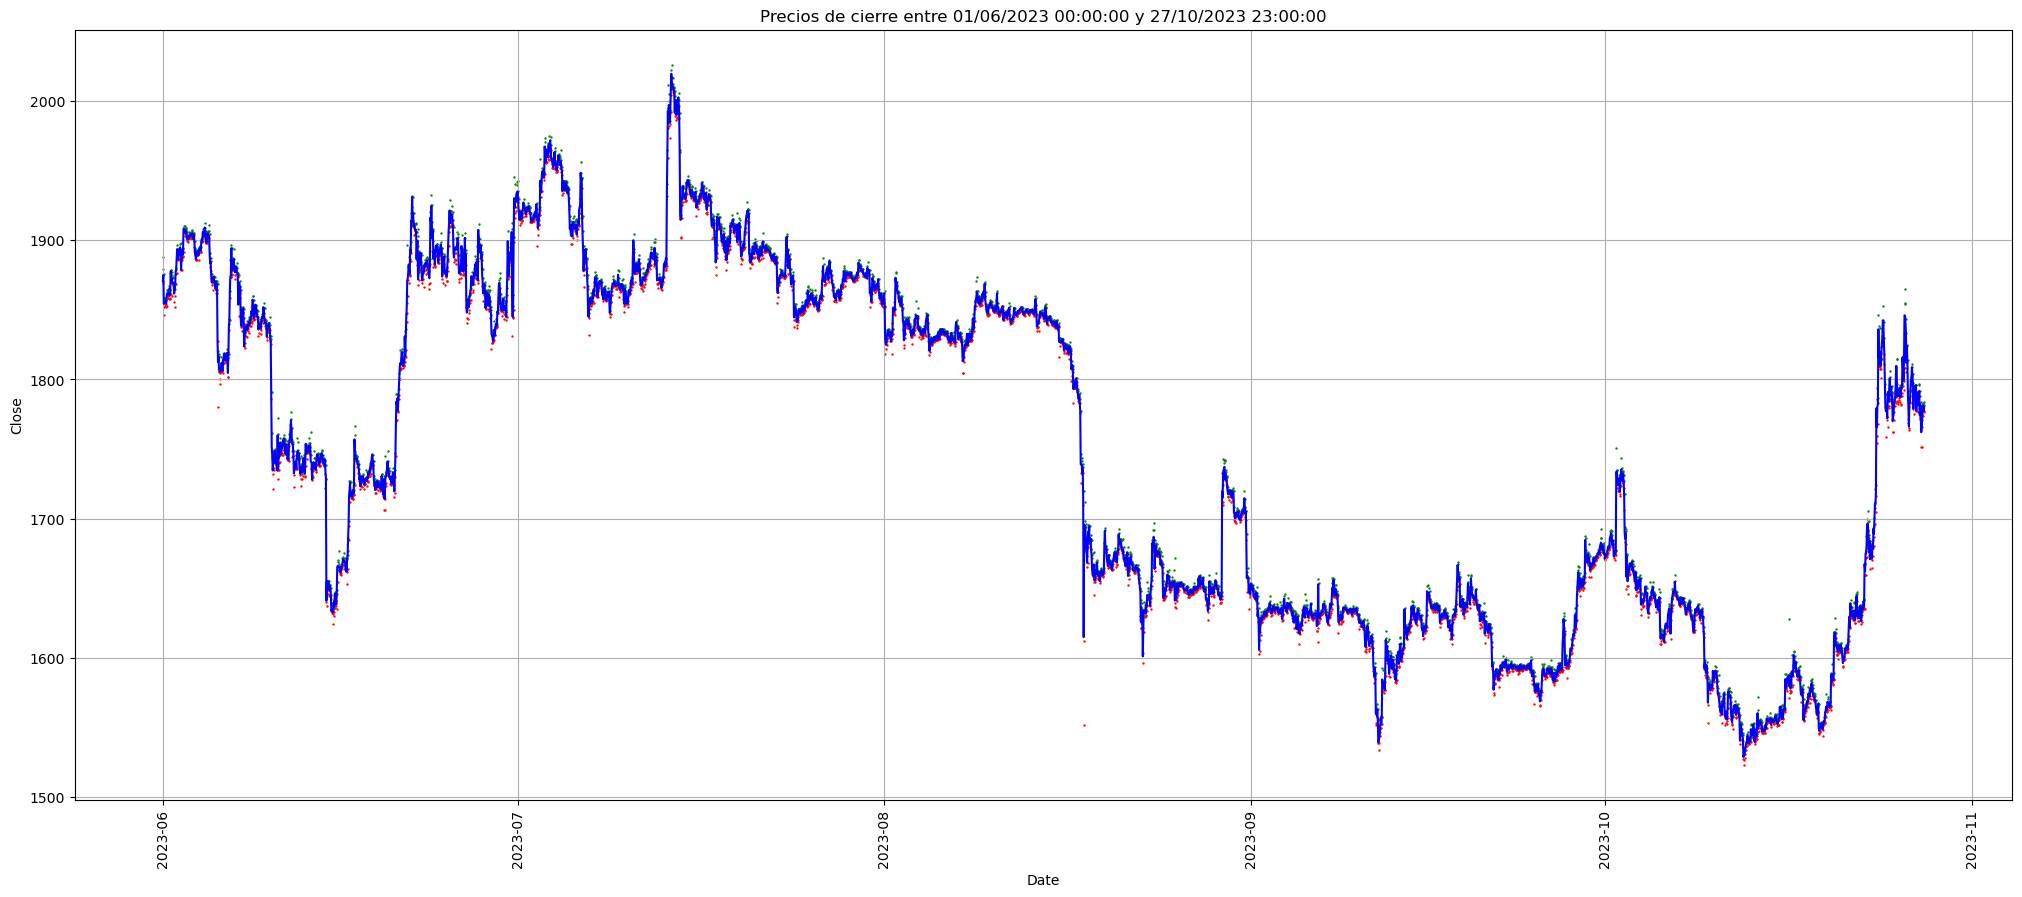

In [75]:
# Gráfico precios de cierre ETH 
plt.figure(figsize=(25, 10))
plt.plot(eth_data.index, eth_data['Close'], linestyle='-', color = 'blue')
plt.scatter(eth_data.index, eth_data['High'], color='green', marker='o', label='Puntos de datos', s = 0.5)
plt.scatter(eth_data.index, eth_data['Low'], color='red', marker='o', label='Puntos de datos', s = 0.5)
plt.title(f"Precios de cierre entre {eth_data.index[0].strftime('%d/%m/%Y %H:%M:%S')} y {eth_data.index[-1].strftime('%d/%m/%Y %H:%M:%S')}")
plt.xlabel("Date")
plt.ylabel("Close")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

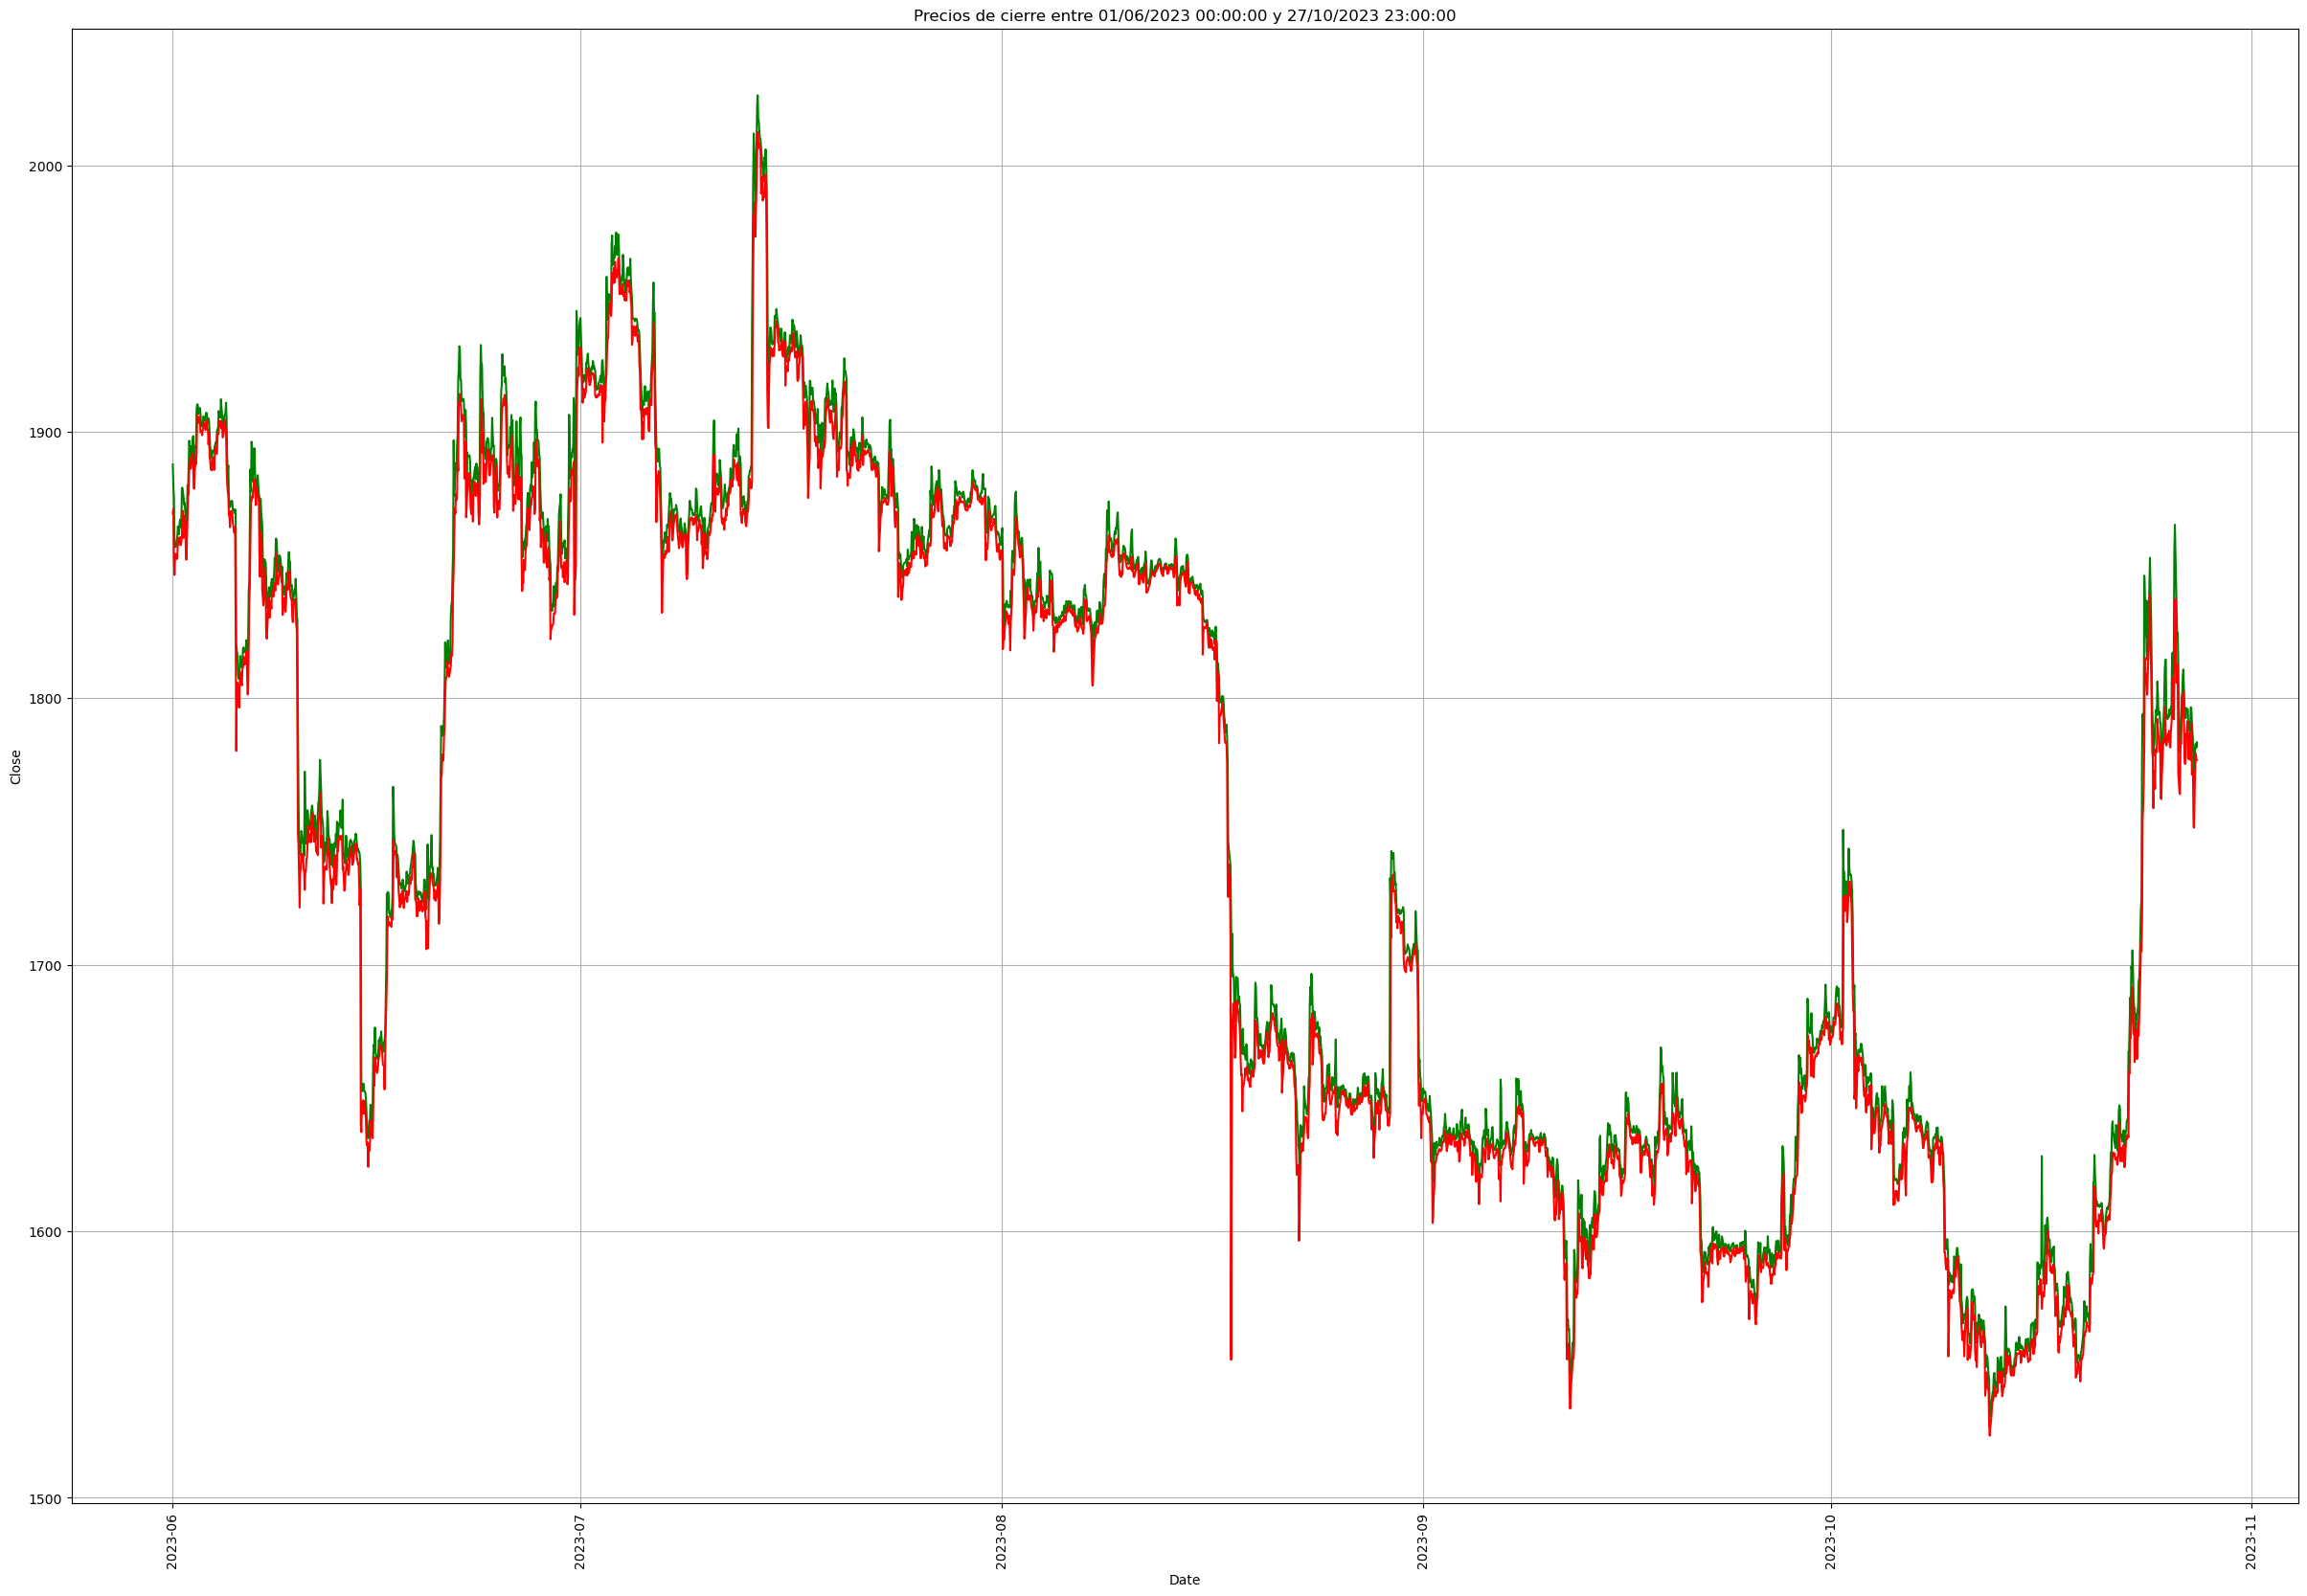

In [44]:
# Gráfico precios de cierre ETH 
plt.figure(figsize=(30, 20))
#plt.plot(eth_data.index, eth_data['Close'], linestyle='-', color = 'black')
plt.plot(eth_data.index, eth_data['High'], color='green', linestyle='-')
plt.plot(eth_data.index, eth_data['Low'], color='red', linestyle='-')
plt.title(f"Precios de cierre entre {eth_data.index[0].strftime('%d/%m/%Y %H:%M:%S')} y {eth_data.index[-1].strftime('%d/%m/%Y %H:%M:%S')}")
plt.xlabel("Date")
plt.ylabel("Close")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

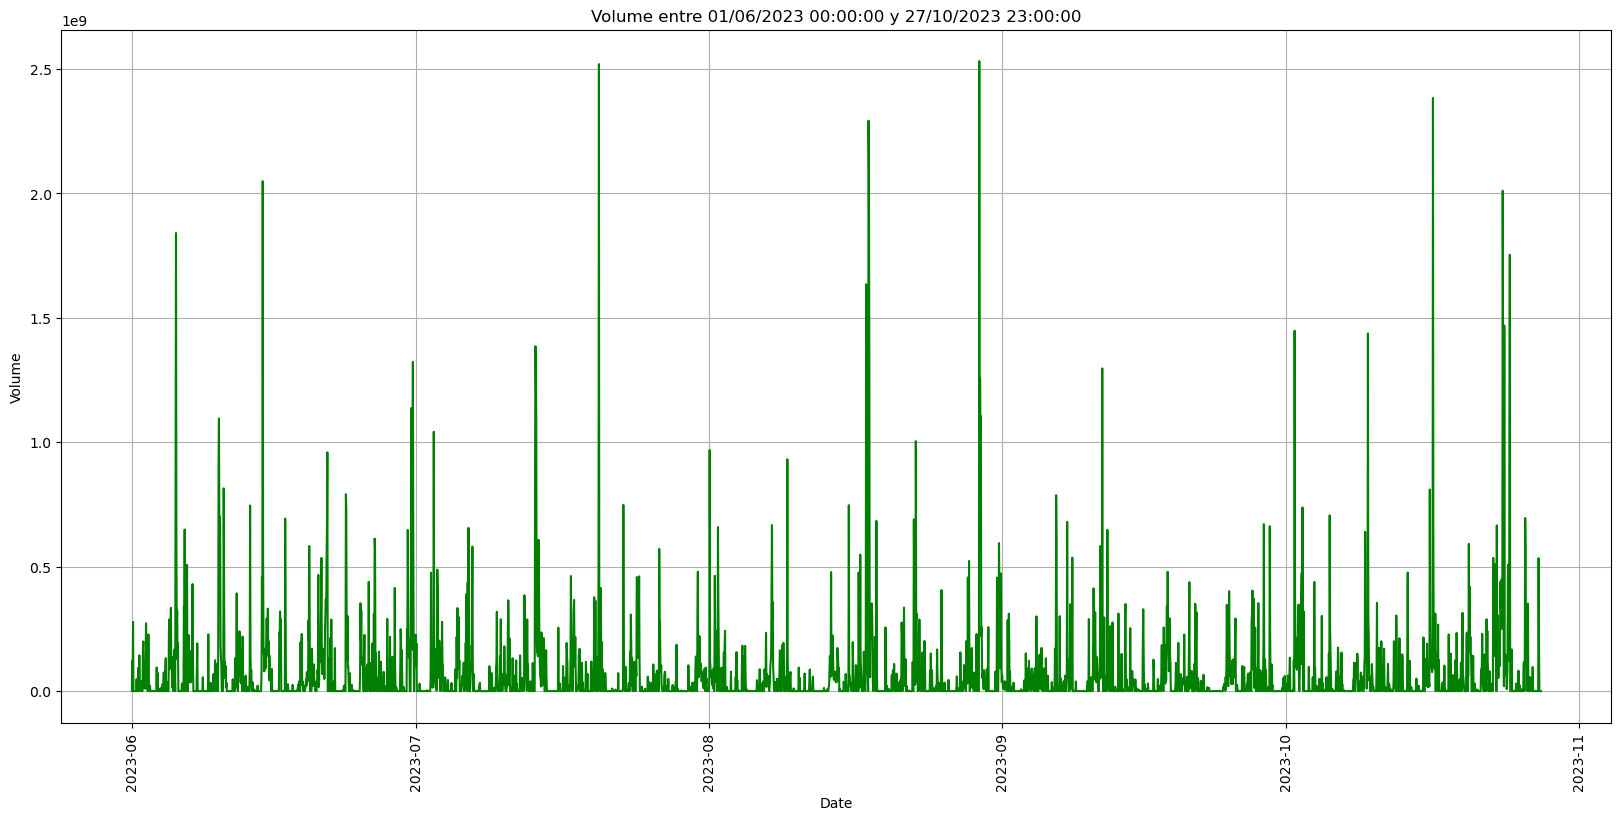

In [82]:
# Gráfico Volume ETH 
plt.figure(figsize=(20, 9))
plt.plot(eth_data.index, eth_data['Volume'], linestyle='-', color = 'green')
plt.title(f"Volume entre {eth_data.index[0].strftime('%d/%m/%Y %H:%M:%S')} y {eth_data.index[-1].strftime('%d/%m/%Y %H:%M:%S')}")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

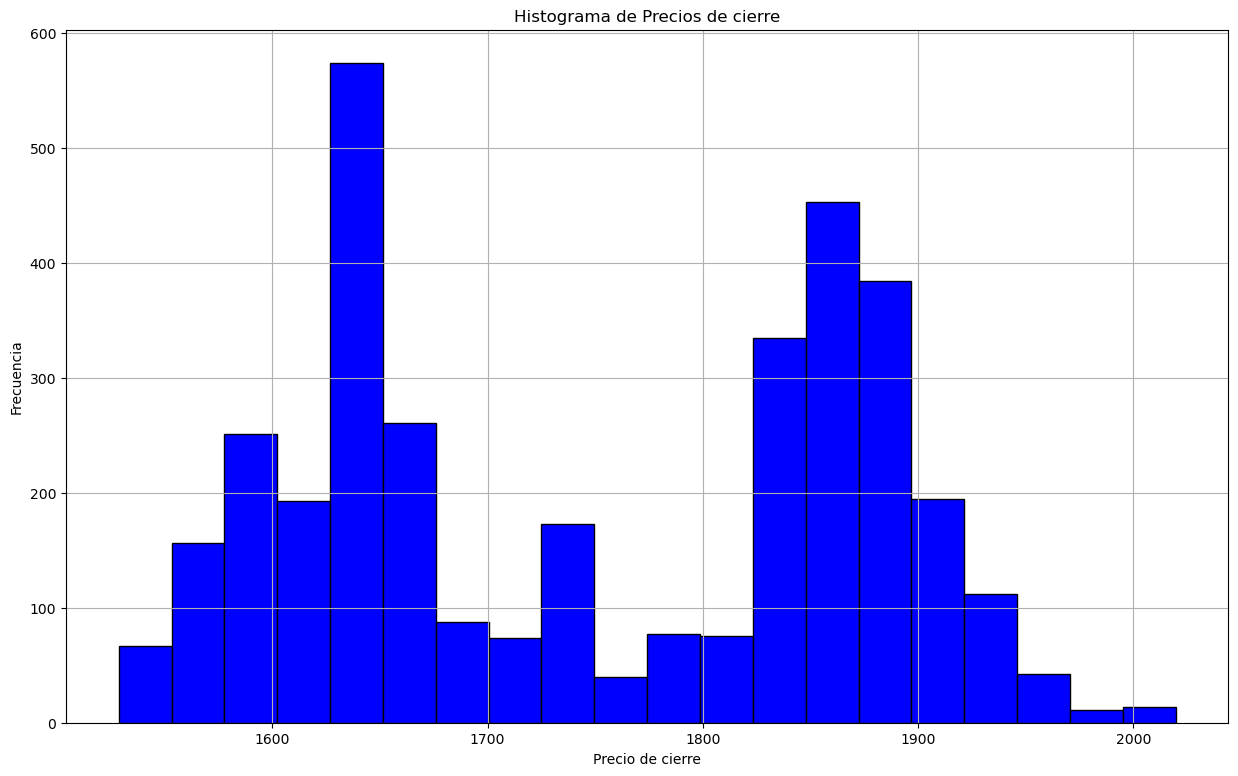

In [46]:
# Histograma de precios de cierre ETH
plt.figure(figsize=(15, 9))
plt.hist(eth_data['Close'], bins=20, color='blue', edgecolor='black')
plt.title("Histograma de Precios de cierre")
plt.xlabel("Precio de cierre")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


In [77]:
#@title Calculo variables adicionales
eth_data['SMA_24'] = eth_data['Close'].rolling(window=20).mean()
# indicador de volatilidad (desviación estándar de 20 días)
eth_data['Volatility_24'] = eth_data['Close'].rolling(window=20).std()


In [78]:
eth_data.iloc[:, -2:]

,SMA_24,Volatility_24
Datetime,,
2023-06-01 00:00:00+00:00,NaN,NaN
2023-06-01 01:00:00+00:00,NaN,NaN
2023-06-01 02:00:00+00:00,NaN,NaN
2023-06-01 03:00:00+00:00,NaN,NaN
2023-06-01 04:00:00+00:00,NaN,NaN
...,...,...
2023-10-27 19:00:00+00:00,1783.746460,10.326838
2023-10-27 20:00:00+00:00,1782.957379,9.834598
2023-10-27 21:00:00+00:00,1783.046161,9.804367


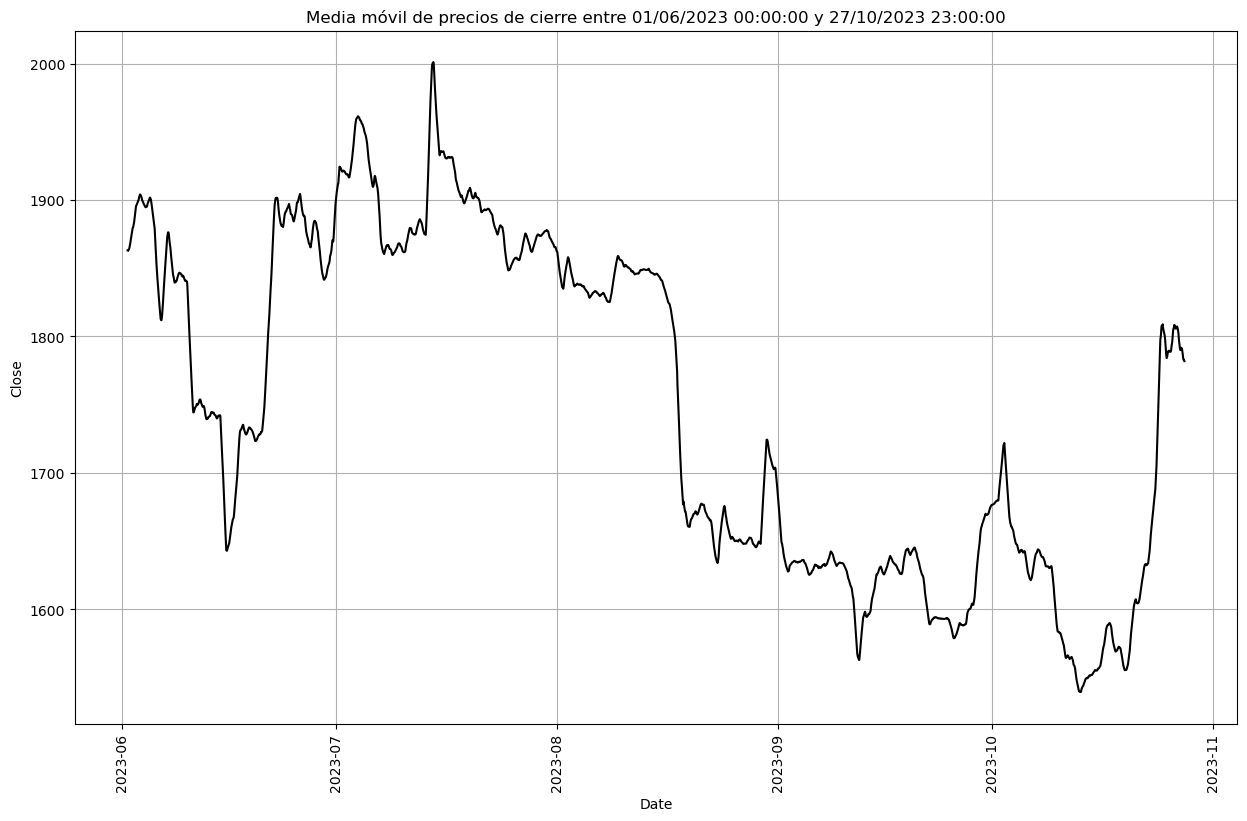

In [79]:
# Media móvil
plt.figure(figsize=(15, 9))
plt.plot(eth_data.index, eth_data['SMA_24'], linestyle='-', color = 'black')
plt.title(f"Media móvil de precios de cierre entre {eth_data.index[0].strftime('%d/%m/%Y %H:%M:%S')} y {eth_data.index[-1].strftime('%d/%m/%Y %H:%M:%S')}")
plt.xlabel("Date")
plt.ylabel("Close")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

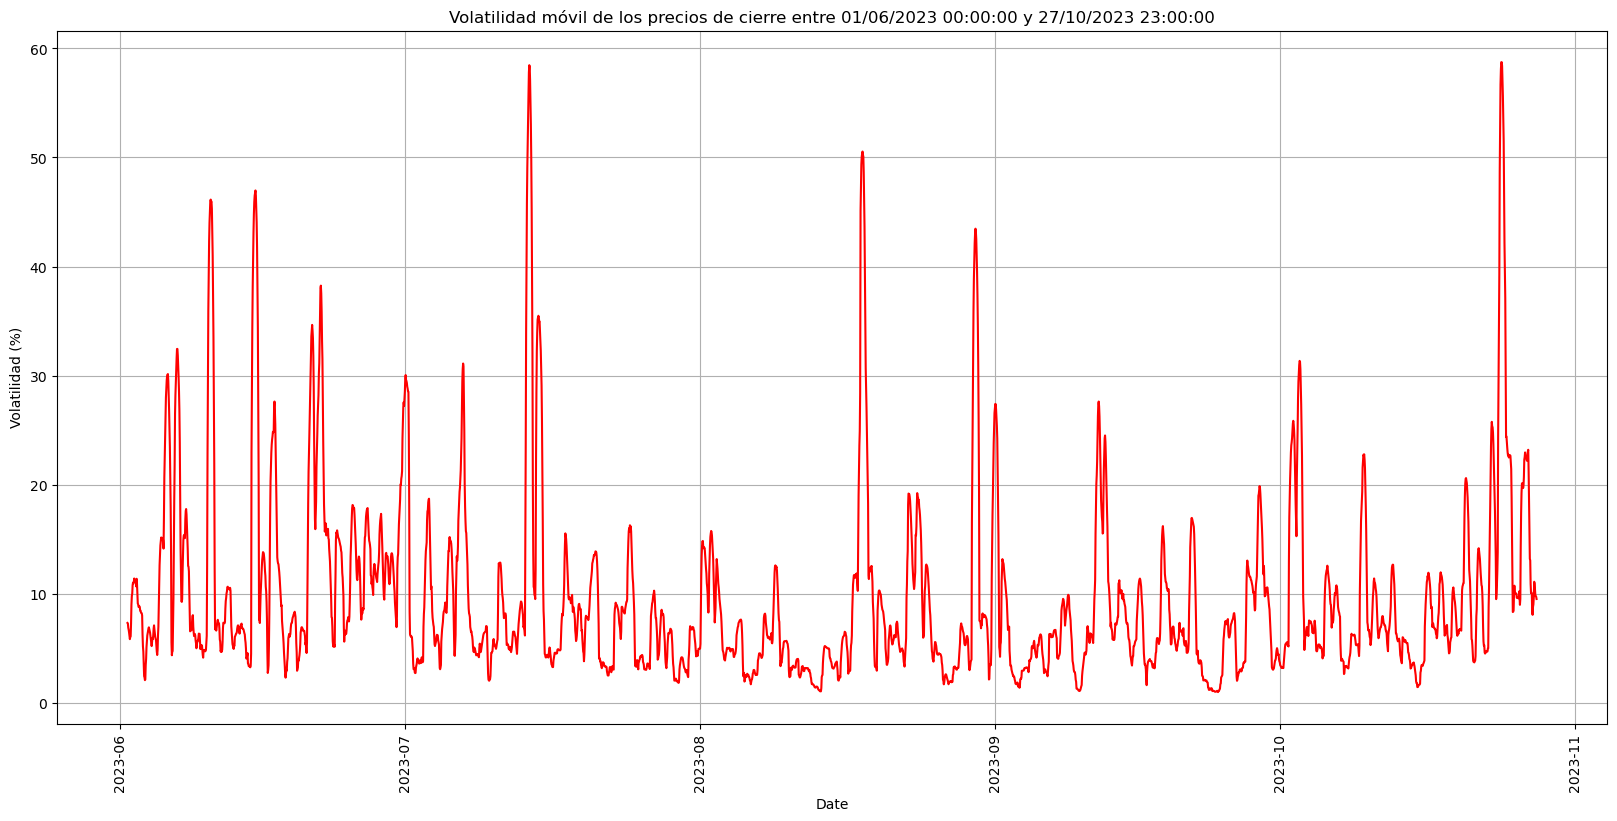

In [81]:
# Volatilidad móvil 
plt.figure(figsize=(20, 9))
plt.plot(eth_data.index, eth_data['Volatility_24'], linestyle='-', color = 'red')
plt.title(f"Volatilidad móvil de los precios de cierre entre {eth_data.index[0].strftime('%d/%m/%Y %H:%M:%S')} y {eth_data.index[-1].strftime('%d/%m/%Y %H:%M:%S')}")
plt.xlabel("Date")
plt.ylabel("Volatilidad (%)")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Modelo Ornstein-Uhlenbeck

## Modelado priors

In [3]:
data = {}
data['X'] = eth_data['Close']
data['N'] = len(eth_data['Close'])

In [5]:


# Datos de precio de cierre de Ethereum (esto es solo un ejemplo, debes reemplazarlo con tus datos)

# Modelo Stan
ou_model_code = """
data {
    int<lower=0> N;
    real X[N];
}

parameters {
    real mu;
    real<lower=0> theta;
    real<lower=0> sigma;
}

model {
    mu ~ normal(1600, 30);          // Prior para mu
    theta ~ normal(70, 10);       // Prior para theta
    sigma ~ inv_gamma(2, 2);     // Prior para sigma

    for (n in 2:N)
        X[n] ~ normal(mu + (X[n-1] - mu) * exp(-theta), sigma);
}
"""

# Compilación del modelo
sm = pystan.StanModel(model_code=ou_model_code)

# Ajuste del modelo
fit = sm.sampling(data=data, iter=1000, chains=4)

# Resultados
print(fit)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_15d63d0d7213ecd8b51c527afd66581d NOW.


ImportError: numpy.core.multiarray failed to import

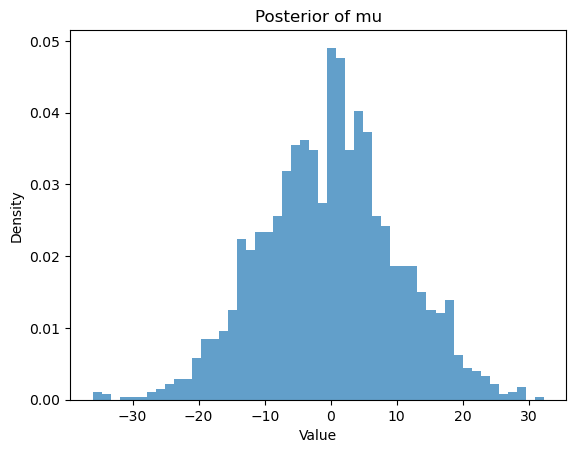

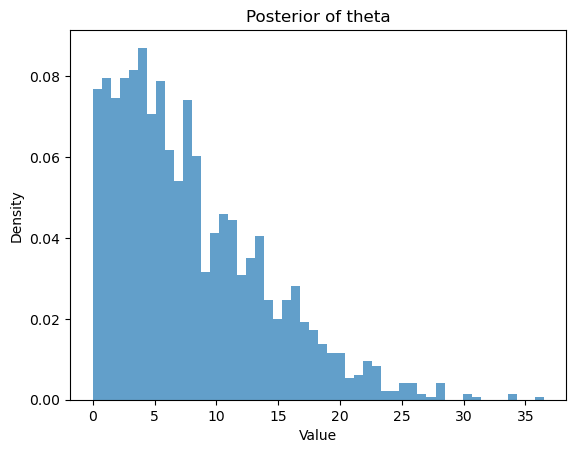

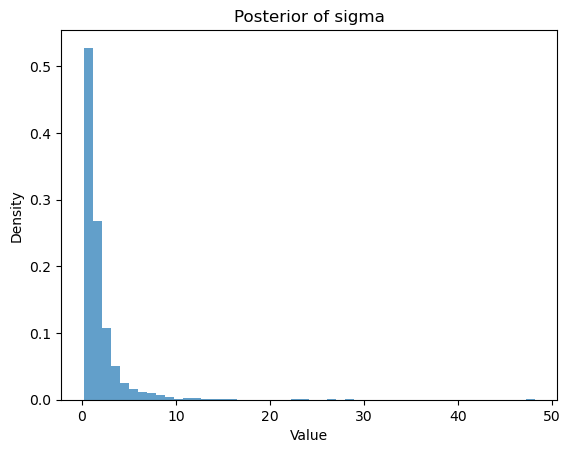

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Extrae las muestras
samples = fit.extract(permuted=True)
mu_samples = samples['mu']
theta_samples = samples['theta']
sigma_samples = samples['sigma']

# Define una función para graficar un histograma de las muestras
def plot_samples(samples, title):
    plt.hist(samples, bins=50, density=True, alpha=0.7)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

# Grafica los histogramas de las muestras
plot_samples(mu_samples, 'Posterior of mu')
plot_samples(theta_samples, 'Posterior of theta')
plot_samples(sigma_samples, 'Posterior of sigma')


In [10]:
import arviz as az
import matplotlib.pyplot as plt

# Convertir los resultados de PyStan a un formato que arviz pueda leer
posterior = az.from_pystan(posterior=fit)

# Graficar las distribuciones posteriores
az.plot_posterior(posterior)
plt.show()

# También puedes visualizar las trazas de las cadenas de Markov
az.plot_trace(posterior)
plt.show()


ImportError: DLL load failed while importing _netCDF4: No se encontró el proceso especificado.

In [2]:
import pystan

# Definición del código Stan
stan_code = """
data {
  int<lower=0> n;  // Número de lanzamientos
  int<lower=0> y;  // Número de caras
}

parameters {
  real<lower=0, upper=1> p_uniforme;  // Probabilidad de cara usando prior uniforme
  real<lower=0, upper=1> p_beta;      // Probabilidad de cara usando prior beta
  real<lower=0, upper=1> p_normal;    // Probabilidad de cara usando prior normal
}

model {
  // Priors
  p_uniforme ~ uniform(0, 1);  // Distribución uniforme entre 0 y 1
  p_beta ~ beta(2, 2);         // Distribución beta con parámetros alpha=2 y beta=2
  p_normal ~ normal(0.5, 0.1); // Distribución normal con media 0.5 y desviación estándar 0.1

  // Likelihood
  y ~ binomial(n, p_uniforme);
  y ~ binomial(n, p_beta);
  y ~ binomial(n, p_normal);
}

"""

# Compilación del modelo
sm = pystan.StanModel(model_code=stan_code)

# Datos para el ajuste
data = {
    'n': 100,  # 100 lanzamientos
    'y': 61   # 61 caras
}

# Ajuste del modelo a los datos
fit = sm.sampling(data=data, iter=1000, chains=4)

# Resumen del ajuste
print(fit)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1dd9ea8f3be38a3c396dba935b7428ce NOW.


Inference for Stan model: anon_model_1dd9ea8f3be38a3c396dba935b7428ce.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p_uniforme   0.61  1.1e-3   0.05   0.51   0.58   0.61   0.64    0.7   1937    1.0
p_beta        0.6  1.1e-3   0.05   0.51   0.57    0.6   0.64    0.7   1985    1.0
p_normal     0.59  9.9e-4   0.04    0.5   0.56   0.59   0.62   0.68   1992    1.0
lp__       -208.3    0.04   1.26 -211.6 -208.9 -208.0 -207.4 -206.9   1005    1.0

Samples were drawn using NUTS at Sat Oct 28 14:20:20 2023.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


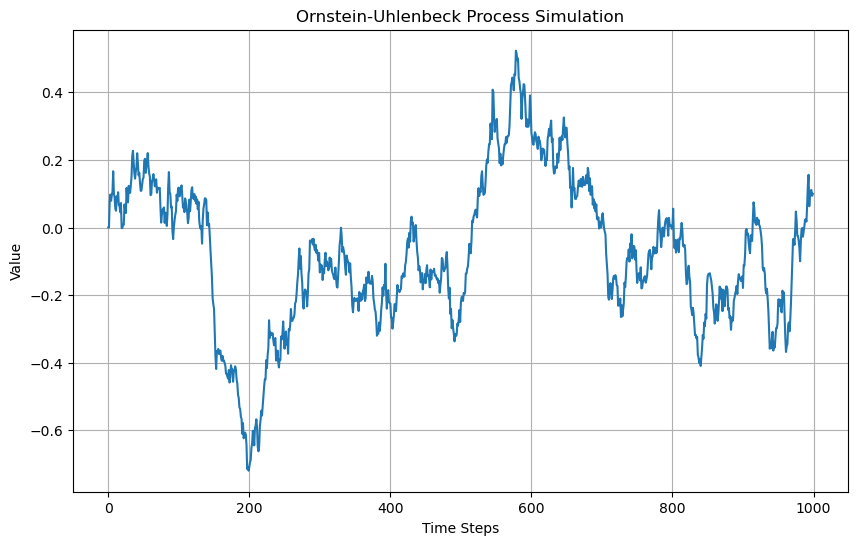

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ou_process(mu, theta, sigma, dt=1e-2, n_steps=1000):
    """Simulate a discrete-time realization of an Ornstein-Uhlenbeck process."""
    X = np.zeros(n_steps)
    noise = np.random.randn(n_steps - 1)
    for t in range(n_steps - 1):
        X[t + 1] = X[t] + theta * (mu - X[t]) * dt + sigma * np.sqrt(dt) * noise[t]
    return X

# Parámetros
mu = 0
theta = 1
sigma = 0.3

ou_process = simulate_ou_process(mu, theta, sigma)

plt.figure(figsize=(10, 6))
plt.plot(ou_process)
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Ornstein-Uhlenbeck Process Simulation')
plt.grid(True)
plt.show()
